In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
cd "D:\Hung's Project\Datasets"
# This my CWD, you might wanna change it once you download the dataset

D:\Hung's Project\Datasets


In [3]:
movies = pd.read_csv('./movies.csv',encoding = 'UTF8')

In [4]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
movies.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [7]:
movies.describe()
# some columns aren't numeric, so we didn't get all the columns

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [8]:
movies.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [9]:
movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [10]:
movies = movies.fillna(0)

In [11]:
movies = movies.astype({'budget':int, 'gross':int, 'votes':int,'gross':int,'star':str})


In [12]:
movies

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0


In [13]:
# Find the companies with the top gross revenue
movies.sort_values(by = ['gross'], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Loving Annabelle,Not Rated,Drama,2006,"May 24, 2007 (Germany)",6.3,12000,Katherine Brooks,Katherine Brooks,Erin Kelly,United States,1000000,0,Big Easy Pictures,77.0
7667,Tee em el,0,Horror,2020,"August 19, 2020 (United States)",5.7,7,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,0,0,PK 65 Films,102.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,-2147483648,Twentieth Century Fox,194.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,-2147483648,Marvel Studios,181.0


In [14]:
# I don't know what is wrong with my python because the 3 movies Titanic, Avengers: Endgame and Avatar has gross exceeded int32 and python doesn't read them as int64
# I'm gonna change it manually, I'll fix in the future, sorry for the unprofessional coding
movies['gross'] = movies['gross'].astype(np.int64)
movies.loc[3045,'gross'] = 2201647264
movies.loc[7445,'gross'] = 2797501328
movies.loc[5445,'gross'] = 2847246203

In [15]:
# Okay, let's find see how many companies in the dataset
print(movies['company'].unique())

['Warner Bros.' 'Columbia Pictures' 'Lucasfilm' ... 'Dow Jazz Films'
 'Embi Productions' 'PK 65 Films']


In [16]:
movies['company'].drop_duplicates()

0              Warner Bros.
1         Columbia Pictures
2                 Lucasfilm
3        Paramount Pictures
4            Orion Pictures
               ...         
7658           Notis Studio
7660    Abominable Pictures
7661         Dow Jazz Films
7665       Embi Productions
7667            PK 65 Films
Name: company, Length: 2386, dtype: object

In [17]:
# Some of the newest and oldest movies released ( according to the dataset) :
movies[['name','year']].sort_values('year',ascending = False)

,name,year
7667,Tee em el,2020
7655,Legend of Deification,2020
7643,Tenet,2020
7645,Birds of Prey,2020
7646,The Invisible Man,2020
...,...,...
64,Resurrection,1980
65,Fatso,1980
66,Moscow Does Not Believe in Tears,1980
67,The Fiendish Plot of Dr. Fu Manchu,1980


In [18]:
movies['country'].unique()

array(['United Kingdom', 'United States', 'South Africa', 'West Germany',
       'Canada', 'Australia', 'Libya', 'Italy', 'Soviet Union', 'France',
       'Hong Kong', 'South Korea', 'Sweden', 'Spain', 'Mexico',
       'Switzerland', 'Netherlands', 'New Zealand', 'Philippines',
       'Israel', 'Japan', 'Hungary', 'Brazil', 'Yugoslavia', 'Argentina',
       'Taiwan', 'Ireland', 'Denmark', 'Germany', 'Iran', 'China',
       'Belgium', 'Austria', 'Portugal', 'Vietnam',
       'Republic of Macedonia', 'Russia',
       'Federal Republic of Yugoslavia', 'Greece', 'Czech Republic',
       'Norway', 'India', 'Jamaica', 'Aruba', 'Thailand', 'Colombia',
       'Romania', 0, 'United Arab Emirates', 'Indonesia', 'Turkey',
       'Serbia', 'Poland', 'Kenya', 'Finland', 'Iceland', 'Chile',
       'Panama', 'Malta', 'Lebanon'], dtype=object)

In [19]:
# Select the top 10 country by amount of movies released
top_ten_countries = pd.DataFrame(movies['country'].value_counts()).head(10)

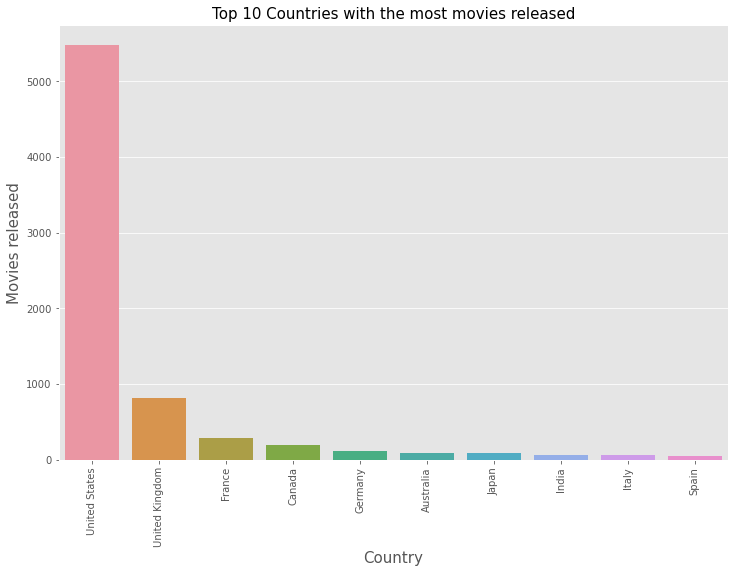

In [20]:
sns.barplot(x = top_ten_countries.index, y = top_ten_countries['country'])
plt.title('Top 10 Countries with the most movies released', fontsize = 15)
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Movies released', fontsize = 15)
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9], labels = top_ten_countries.index.tolist(), rotation = 90)
plt.show()

In [21]:
# Same with top 10 companies
top_ten_companies = pd.DataFrame(movies['company'].value_counts()).head(10)

In [22]:
top_ten_companies

,company
Universal Pictures,377
Warner Bros.,334
Columbia Pictures,332
Paramount Pictures,320
Twentieth Century Fox,240
New Line Cinema,174
Touchstone Pictures,132
Metro-Goldwyn-Mayer (MGM),125
Walt Disney Pictures,123
TriStar Pictures,94


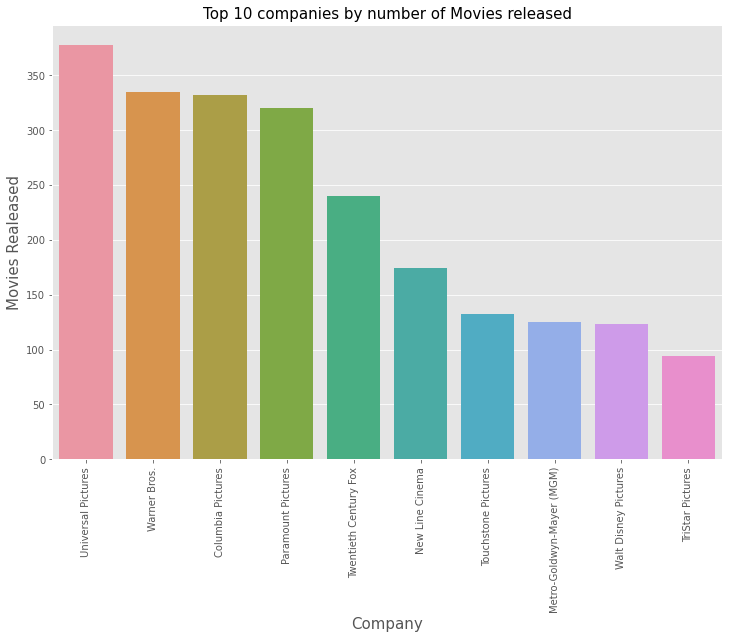

In [23]:
sns.barplot(x = top_ten_companies.index, y = top_ten_companies['company'])
plt.title('Top 10 companies by number of Movies released',fontsize = 15)
plt.xlabel('Company', fontsize = 15)
plt.ylabel('Movies Realeased', fontsize = 15)
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9], labels = top_ten_companies.index, rotation = 90)
plt.show()

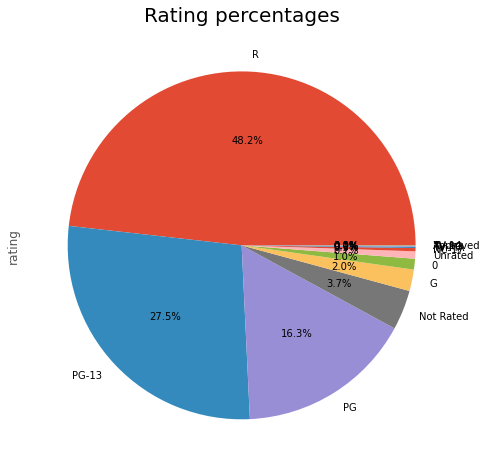

In [24]:
movies['rating'].value_counts().plot.pie(autopct = '%1.1f%%', shadow = False, figsize = (10,8))
plt.title('Rating percentages', fontsize = 20)
plt.show()

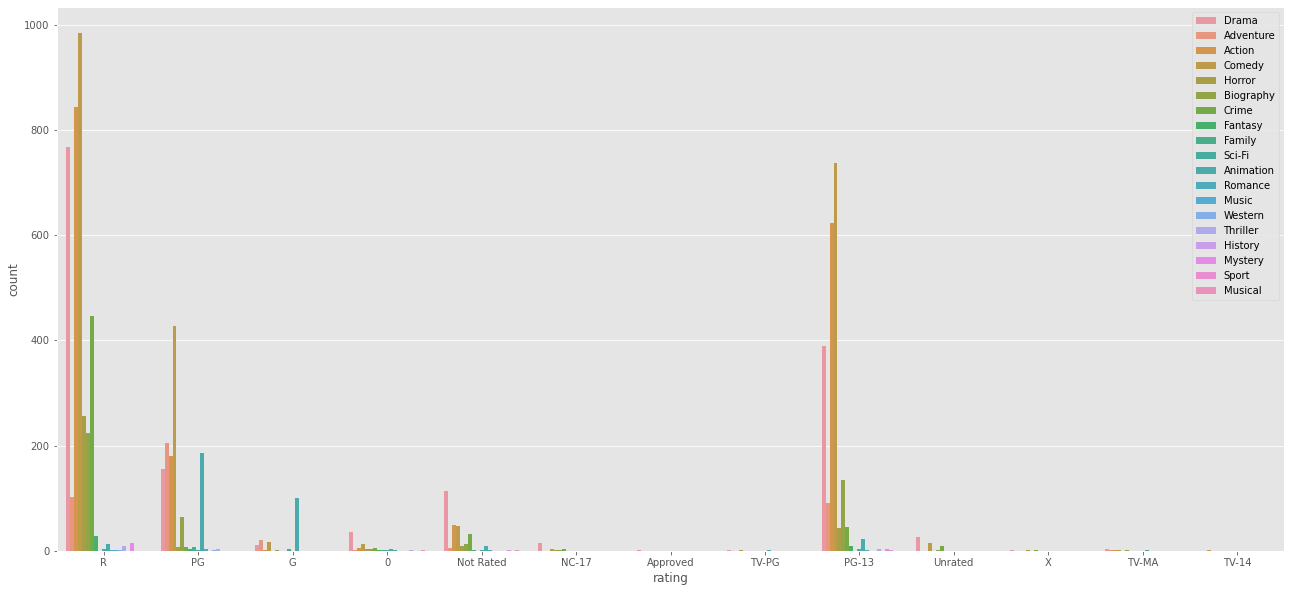

In [25]:
plt.figure(figsize = (22,10))
sns.countplot(x = 'rating', data = movies, hue = 'genre')
plt.legend(loc = 'upper right')
plt.show()

In [26]:
# Since USA is seen as the heart of the world's movie industry,such as Star Wars and Avengers ,let's dive into the ACTION genre
usa = movies[movies['genre'] == 'Action'][movies['country'] == 'United States']

C:\Users\Hung Pham\AppData\Local\Temp\ipykernel_568\4125918976.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  usa = movies[movies['genre'] == 'Action'][movies['country'] == 'United States']


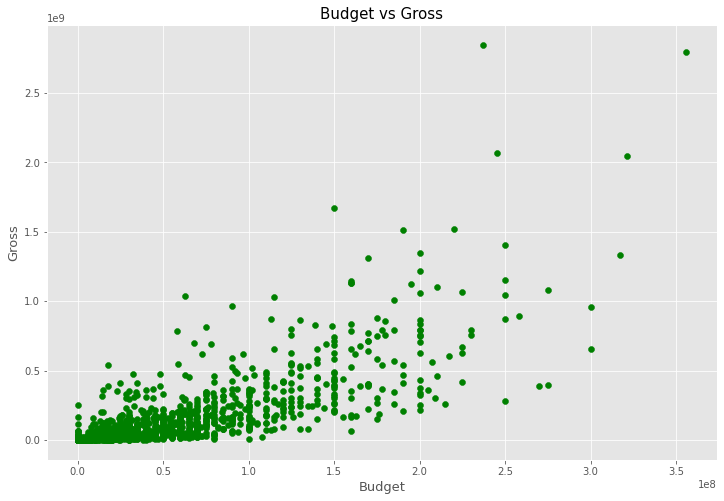

In [27]:
plt.scatter(usa['budget'], usa['gross'], c = 'green')
plt.title('Budget vs Gross', fontsize = 15)
plt.xlabel('Budget', fontsize = 13)
plt.ylabel('Gross', fontsize = 13)
plt.show()
# 

In [28]:
# AS you can see here, the budget rises intensely but the gross doesn't increase at the same rate, more companies should focus on maximizing budget

In [29]:
# Next, let's see what name appear the most in the Star column.
actor = WordCloud().generate(' '.join(movies['star']))
# And also for the director as well, a bad movie is a movie without a good director
director = WordCloud().generate(' '.join(movies['director']))

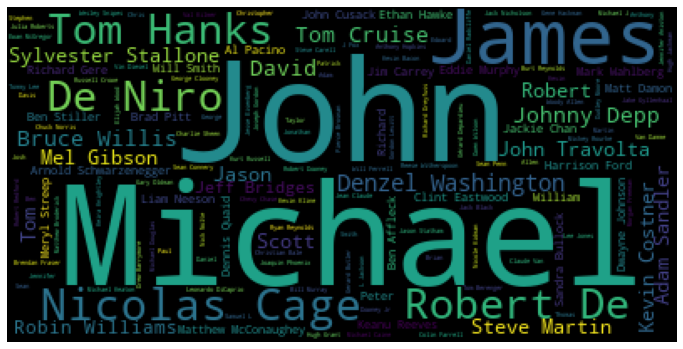

In [30]:
plt.imshow(actor)
plt.axis('off')
plt.show()

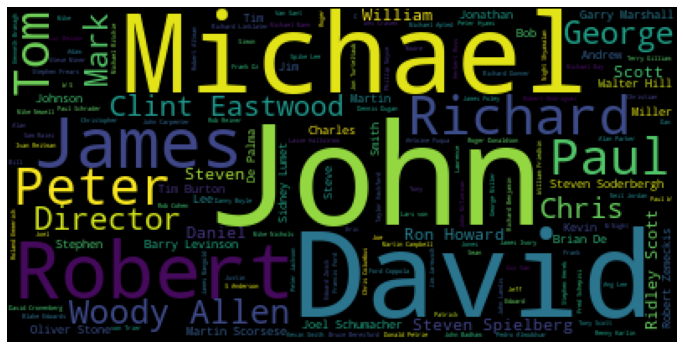

In [31]:
plt.imshow(director)
plt.axis('off')
plt.show()

In [32]:
# The three names John, Michael and James are very very popular among others, I guess famous director work on multiple movies at the same time,  I guess
# Alright, we finished doing analysis on the movie industry, especially in the USA. Thank you for reading my analysis, and if you spot any bug or unprofessional code please let me know !